**High‑Dimensional Spaces Have Huge Capacity**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

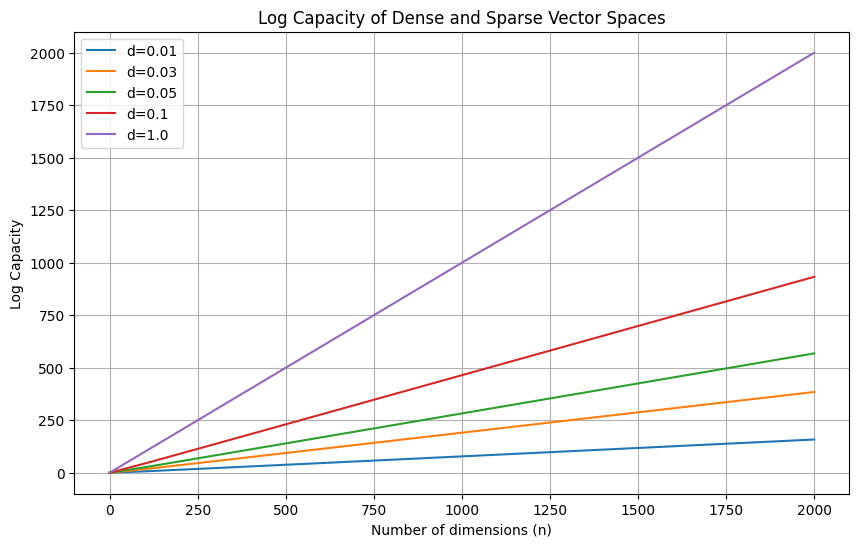

In [ ]:
dimensions = np.arange(0, 2001, 100)  
densities = [0.01, 0.03, 0.05, 0.10, 1.0]  
def calculate_log_capacity(n, d):
    if d == 1.0:
        return n * np.log2(2)
    else:
        k = int(d * n)
        return np.log2(comb(n, k, exact=False))
plt.figure(figsize=(10, 6))
for d in densities:
    log_capacities = [calculate_log_capacity(n, d) for n in dimensions]
    plt.plot(dimensions, log_capacities, label=f'd={d}')

plt.xlabel('Number of dimensions (n)')
plt.ylabel('Log Capacity')
plt.title('Log Capacity of Dense and Sparse Vector Spaces')
plt.legend()
plt.grid(True)
plt.show()


**Random Vectors are Very Likely Almost
Orthogonal**

Using device: cuda
Processing dimension: 0
  Sigma=0.1, Probability of False Match=1.0000
  Sigma=0.25, Probability of False Match=1.0000
  Sigma=0.5, Probability of False Match=1.0000
Processing dimension: 1
  Sigma=0.1, Probability of False Match=1.0000
  Sigma=0.25, Probability of False Match=1.0000
  Sigma=0.5, Probability of False Match=1.0000
Processing dimension: 2
  Sigma=0.1, Probability of False Match=1.0000
  Sigma=0.25, Probability of False Match=1.0000
  Sigma=0.5, Probability of False Match=1.0000
Processing dimension: 3
  Sigma=0.1, Probability of False Match=1.0000
  Sigma=0.25, Probability of False Match=0.9980
  Sigma=0.5, Probability of False Match=1.0000
Processing dimension: 4
  Sigma=0.1, Probability of False Match=1.0000
  Sigma=0.25, Probability of False Match=1.0000
  Sigma=0.5, Probability of False Match=1.0000
Processing dimension: 5
  Sigma=0.1, Probability of False Match=1.0000
  Sigma=0.25, Probability of False Match=1.0000
  Sigma=0.5, Probability of Fals

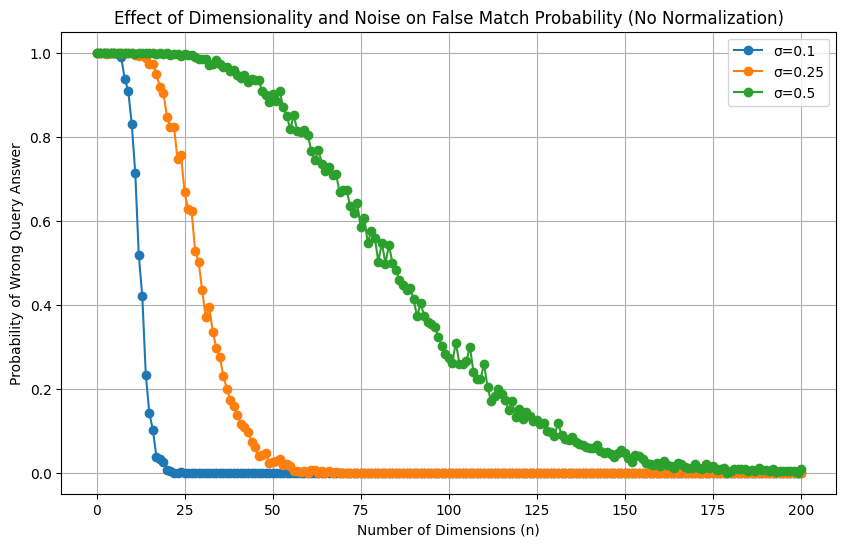

In [ ]:
import torch  
import numpy as np
import matplotlib.pyplot as plt
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

dimensions = np.arange(0, 201)  
sigma_values = [0.1, 0.25, 0.5]  
database_size = 1000000 
num_trials = 500  

def generate_database_vectors(n, size):
    database_vectors = torch.rand(size, n, device=device)
    return database_vectors

def single_trial(database_vectors, sigma):
    n = database_vectors.shape[1]
    db_size = database_vectors.shape[0]
    idx = torch.randint(0, db_size, (1,), device=device).item()
    true_vector = database_vectors[idx]
    noise = torch.normal(mean=0.0, std=sigma, size=(n,), device=device)
    query_vector = true_vector + noise
    dot_products = torch.mv(database_vectors, query_vector)
    norms_db = torch.norm(database_vectors, dim=1)
    norm_query = torch.norm(query_vector)
    similarities = dot_products / (norms_db * norm_query + 1e-8)  
    similarities = torch.nan_to_num(similarities, nan=0.0, posinf=0.0, neginf=0.0)
    max_idx = torch.argmax(similarities).item()
    if max_idx == idx:
        return 0 
    else:
        return 1  
results = {sigma: [] for sigma in sigma_values}

for n in dimensions:
    print(f"Processing dimension: {n}")
    database_vectors = generate_database_vectors(n, database_size)
    for sigma in sigma_values:
        errors = 0
        for _ in range(num_trials):
            error = single_trial(database_vectors, sigma)
            errors += error
        probability_false_match = errors / num_trials
        results[sigma].append(probability_false_match)
        print(f"  Sigma={sigma}, Probability of False Match={probability_false_match:.4f}")
    del database_vectors
    torch.cuda.empty_cache()

plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    plt.plot(dimensions, results[sigma],marker='o', label=f'σ={sigma}')
plt.xlabel('Number of Dimensions (n)')
plt.ylabel('Probability of Wrong Query Answer')
plt.title('Effect of Dimensionality and Noise on False Match Probability (No Normalization)')
plt.legend()
plt.grid(True)
plt.show()


Using device: cuda
Running experiment for the left plot ([0, 1] range)...
Processing dimension: 0
  k=2: Probability of Wrong Query Answer = 1.0000
  k=3: Probability of Wrong Query Answer = 1.0000
  k=4: Probability of Wrong Query Answer = 1.0000
  k=5: Probability of Wrong Query Answer = 1.0000
Processing dimension: 30
  k=2: Probability of Wrong Query Answer = 0.8600
  k=3: Probability of Wrong Query Answer = 1.0000
  k=4: Probability of Wrong Query Answer = 1.0000
  k=5: Probability of Wrong Query Answer = 1.0000
Processing dimension: 60
  k=2: Probability of Wrong Query Answer = 0.1500
  k=3: Probability of Wrong Query Answer = 0.9800
  k=4: Probability of Wrong Query Answer = 1.0000
  k=5: Probability of Wrong Query Answer = 1.0000
Processing dimension: 90
  k=2: Probability of Wrong Query Answer = 0.0100
  k=3: Probability of Wrong Query Answer = 0.7100
  k=4: Probability of Wrong Query Answer = 1.0000
  k=5: Probability of Wrong Query Answer = 1.0000
Processing dimension: 120
 

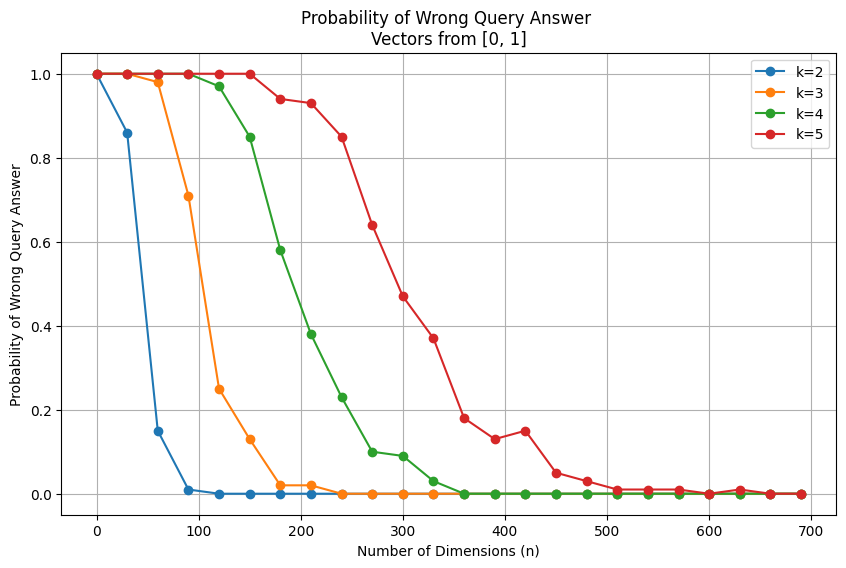


Running experiment for the right plot ([-1, 1] range)...
Processing dimension: 0
  k=2: Probability of Wrong Query Answer = 1.0000
  k=3: Probability of Wrong Query Answer = 1.0000
  k=4: Probability of Wrong Query Answer = 1.0000
  k=5: Probability of Wrong Query Answer = 1.0000
  k=6: Probability of Wrong Query Answer = 1.0000
  k=7: Probability of Wrong Query Answer = 1.0000
  k=8: Probability of Wrong Query Answer = 1.0000
  k=9: Probability of Wrong Query Answer = 1.0000
  k=10: Probability of Wrong Query Answer = 1.0000
Processing dimension: 30
  k=2: Probability of Wrong Query Answer = 0.6000
  k=3: Probability of Wrong Query Answer = 0.9900
  k=4: Probability of Wrong Query Answer = 1.0000
  k=5: Probability of Wrong Query Answer = 1.0000
  k=6: Probability of Wrong Query Answer = 1.0000
  k=7: Probability of Wrong Query Answer = 1.0000
  k=8: Probability of Wrong Query Answer = 1.0000
  k=9: Probability of Wrong Query Answer = 1.0000
  k=10: Probability of Wrong Query Answer 

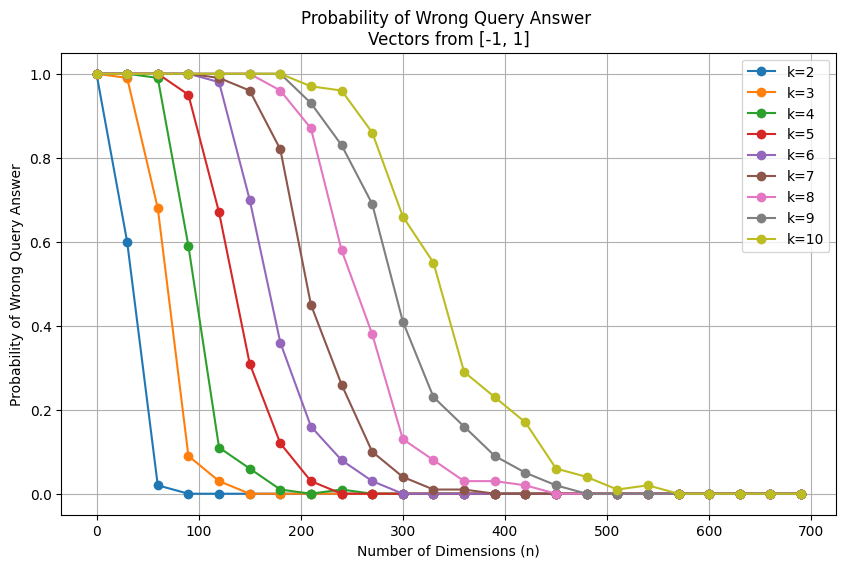

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

dimensions = np.arange(0, 701, 30)  
k_values_left = [2, 3, 4, 5]
k_values_right = [2, 3, 4, 5, 6, 7, 8, 9, 10]  
database_size = 100000  
num_trials = 100  

def generate_database_vectors_left(n, size):
    database_vectors = torch.rand(size, n, device=device)
    return database_vectors

def generate_database_vectors_right(n, size):
    database_vectors = torch.empty(size, n, device=device).uniform_(-1, 1)
    return database_vectors

def single_trial(database_vectors, k):
    n = database_vectors.shape[1]
    db_size = database_vectors.shape[0]
    indices = torch.randint(0, db_size, (k,), device=device)
    true_vectors = database_vectors[indices]
    query_vector = true_vectors.sum(dim=0)
    dot_products = torch.mv(database_vectors, query_vector)
    norms_db = torch.norm(database_vectors, dim=1)
    norm_query = torch.norm(query_vector)
    similarities = dot_products / (norms_db * norm_query + 1e-8)

    similarities = torch.nan_to_num(similarities, nan=0.0, posinf=0.0, neginf=0.0)

    top_k_similarities, top_k_indices = torch.topk(similarities, k)
    top_k_indices = top_k_indices.cpu().numpy()
    indices_cpu = indices.cpu().numpy()

    if set(indices_cpu).issubset(set(top_k_indices)):
        return 1 
    else:
        return 0  

def run_bundling_experiment(dimensions, k_values, database_size, num_trials, generate_database_vectors):
    results = {k: [] for k in k_values}

    for n in dimensions:
        print(f"Processing dimension: {n}")
        database_vectors = generate_database_vectors(n, database_size)

        for k in k_values:
            failures = 0
            for _ in range(num_trials):
                success = single_trial(database_vectors, k)
                if success == 0:
                    failures += 1  
                
            probability_failure = failures / num_trials
            results[k].append(probability_failure)
            print(f"  k={k}: Probability of Wrong Query Answer = {probability_failure:.4f}")
        del database_vectors
        torch.cuda.empty_cache()

    return results

print("Running experiment for the left plot ([0, 1] range)...")
results_left = run_bundling_experiment(
    dimensions=dimensions,
    k_values=k_values_left,
    database_size=database_size,
    num_trials=num_trials,
    generate_database_vectors=generate_database_vectors_left
)

plt.figure(figsize=(10, 6))
for k in k_values_left:
    plt.plot(dimensions, results_left[k], marker='o', label=f'k={k}')
plt.xlabel('Number of Dimensions (n)')
plt.ylabel('Probability of Wrong Query Answer')
plt.title('Probability of Wrong Query Answer \nVectors from [0, 1]')
plt.legend()
plt.grid(True)
plt.show()
print("\nRunning experiment for the right plot ([-1, 1] range)...")
results_right = run_bundling_experiment(
    dimensions=dimensions,
    k_values=k_values_right,
    database_size=database_size,
    num_trials=num_trials,
    generate_database_vectors=generate_database_vectors_right
)
plt.figure(figsize=(10, 6))
for k in k_values_right:
    plt.plot(dimensions, results_right[k], marker='o', label=f'k={k}')
plt.xlabel('Number of Dimensions (n)')
plt.ylabel('Probability of Wrong Query Answer')
plt.title('Probability of Wrong Query Answer \nVectors from [-1, 1]')
plt.legend()
plt.grid(True)
plt.show()


Using device: cuda


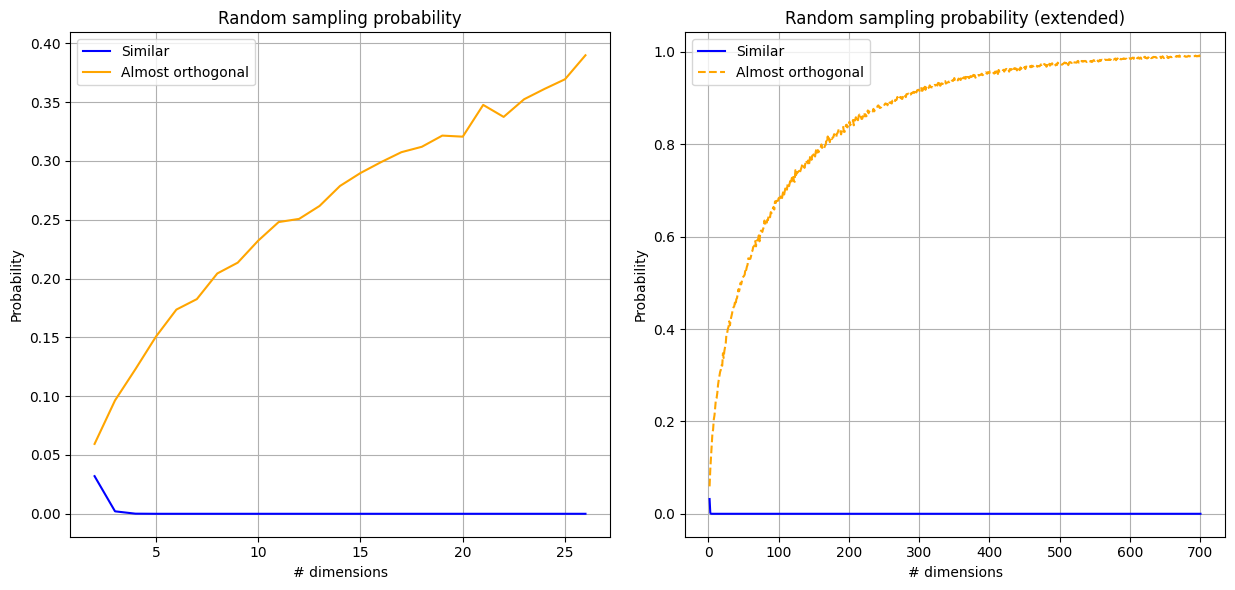

In [ ]:
import torch  
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
max_dim = 700
num_samples = 10000  
epsilon = 0.1  
prob_similar = []
prob_almost_orthogonal = []

dimensions = range(2, max_dim + 1)

for n in dimensions:
    v1 = torch.randn(num_samples, n, device=device)
    v2 = torch.randn(num_samples, n, device=device)
    v1_norm = v1 / v1.norm(dim=1, keepdim=True)
    v2_norm = v2 / v2.norm(dim=1, keepdim=True)
    cos_theta = torch.sum(v1_norm * v2_norm, dim=1)
    cos_theta = torch.clamp(cos_theta, -1.0, 1.0)
    theta = torch.acos(cos_theta)
    count_similar = torch.sum(theta <= epsilon).item()
    count_almost_orthogonal = torch.sum(
        (theta >= (np.pi / 2 - epsilon)) & (theta <= (np.pi / 2 + epsilon))
    ).item()
    prob_similar.append(count_similar / num_samples)
    prob_almost_orthogonal.append(count_almost_orthogonal / num_samples)
    del v1, v2, v1_norm, v2_norm, cos_theta, theta
    torch.cuda.empty_cache()

prob_similar = np.array(prob_similar)
prob_almost_orthogonal = np.array(prob_almost_orthogonal)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 2)
plt.plot(dimensions[:25], prob_similar[:25], label='Similar', color='blue')
plt.plot(dimensions[:25], prob_almost_orthogonal[:25], label='Almost orthogonal', color='orange')
plt.xlabel('# dimensions')
plt.ylabel('Probability')
plt.title('Random sampling probability')
plt.legend()
plt.grid(True)
plt.subplot(1, 3, 3)
plt.plot(dimensions, prob_similar, label='Similar', color='blue')
plt.plot(dimensions, prob_almost_orthogonal, label='Almost orthogonal', color='orange', linestyle='--')
plt.xlabel('# dimensions')
plt.ylabel('Probability')
plt.title('Random sampling probability (extended)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


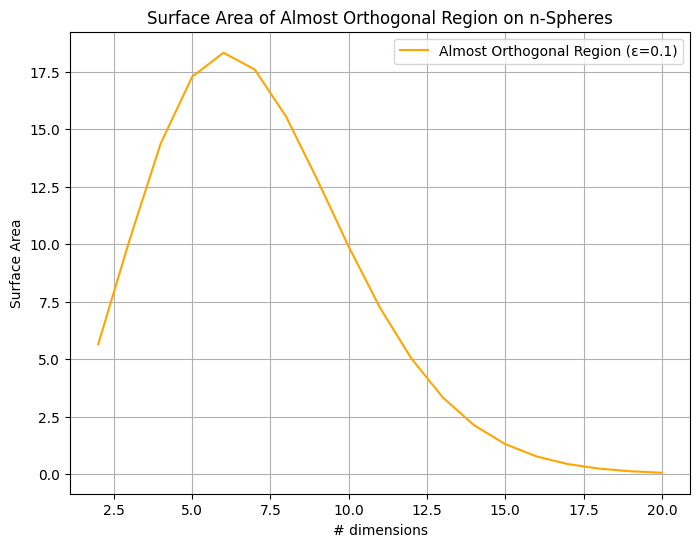

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

def surface_area_n_sphere(n):
    return 2 * np.pi**(n / 2) / gamma(n / 2)
def spherical_cap_area(n, epsilon):
    total_surface_area = surface_area_n_sphere(n)
    cap_area = total_surface_area * (1 - np.cos(epsilon))**(n - 1)
    return cap_area

max_dim = 20  
epsilon = 0.1  
almost_orthogonal_areas = []

for n in range(2, max_dim + 1):
    almost_orthogonal_area = spherical_cap_area(n, np.pi / 2 - epsilon)
    almost_orthogonal_areas.append(almost_orthogonal_area)
plt.figure(figsize=(8, 6))
plt.plot(range(2, max_dim + 1), almost_orthogonal_areas, color='orange', label=f'Almost Orthogonal Region (ε={epsilon})')
plt.xlabel('# dimensions')
plt.ylabel('Surface Area')
plt.title('Surface Area of Almost Orthogonal Region on n-Spheres')
plt.legend()
plt.grid(True)
plt.show()
